# Traveling Salesman Problem
## EX12: LP with subtours

1. Try to solve the TSP with a LP matching model. Use the scipy.linprog package. For the cities coordinates use random points.
1. Plot the resulting network with the matplotlib library.
1. Understand the outputs. What happend to the optimal path?
1. What are the alternatives to this formulation and their disadvantages?

## Generate random cities

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import linprog

import matplotlib.pyplot as plt

from mis_utils import *

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.latex.repr = True

In [2]:
num_cities = 8
dist_max = 100

In [3]:
cities_location = (np.random.random_sample((num_cities, 2))*dist_max) #.astype(int)

In [4]:
node_names = np.zeros((num_cities), dtype = str) #='<S3')

In [5]:
for i in range(ord('a'), ord('a') + num_cities):
    node_names[i - ord('a')] = (chr(i))

In [6]:
node_names

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], dtype='<U1')

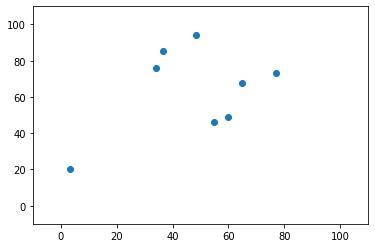

In [7]:
plt.scatter(cities_location[:, 0], cities_location[:, 1])
plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.show()

In [8]:
# Creo la matriz NN

In [9]:
NN = np.zeros((num_cities, num_cities))
NN_w_cost = np.zeros((num_cities, num_cities))

for idx1 in range(num_cities-1):
    for idx2 in range(idx1 + 1, num_cities):
#         print(np.linalg.norm(cities_location[idx1]-cities_location[idx2]))
        NN[idx1, idx2] = 1
        NN[idx2, idx1] = 1
        
        NN_w_cost[idx1, idx2] = np.linalg.norm(cities_location[idx1]-cities_location[idx2])
        NN_w_cost[idx2, idx1] = np.linalg.norm(cities_location[idx1]-cities_location[idx2])

In [10]:
Aeq, arcs = nn2na(NN, node_names)

In [11]:
costs = get_costs(NN_w_cost, arcs)

In [12]:
nan_names = get_col_names(NN, node_names=node_names, as_numpy=True, sep = ".")

In [13]:
Aeq_final = np.zeros((Aeq.shape[0]*2, Aeq.shape[1]), dtype = int)

In [14]:
Aeq_final[0:Aeq.shape[0]] = Aeq==1
Aeq_final[Aeq.shape[0]:] = Aeq==-1

In [15]:
np.append(node_names, node_names)

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'a', 'b', 'c', 'd', 'e',
       'f', 'g', 'h'], dtype='<U1')

In [16]:
pd.DataFrame(NN, index=node_names, columns=node_names)

,a,b,c,d,e,f,g,h
a,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
b,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
c,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
d,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
e,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
f,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
g,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
h,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [17]:
pd.DataFrame(Aeq_final, index=np.append(node_names, node_names), columns=nan_names)

,a.b,a.c,a.d,a.e,a.f,a.g,a.h,b.a,b.c,b.d,b.e,b.f,b.g,b.h,c.a,c.b,c.d,c.e,c.f,c.g,c.h,d.a,d.b,d.c,d.e,d.f,d.g,d.h,e.a,e.b,e.c,e.d,e.f,e.g,e.h,f.a,f.b,f.c,f.d,f.e,f.g,f.h,g.a,g.b,g.c,g.d,g.e,g.f,g.h,h.a,h.b,h.c,h.d,h.e,h.f,h.g
a,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
b,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0
h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1
a,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
b,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [18]:
bounds = tuple([(0, 1.1) for arcs in range(0, nan_names.shape[0])])

In [19]:
beq = np.ones((node_names.shape[0]*2))

In [20]:
beq

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
resume_df = pd.DataFrame(bounds, index=nan_names, columns=['Min bound', 'Max bound'])
resume_df['Costs'] = costs
# resume_df['Max time'] = t
resume_df

,Min bound,Max bound,Costs
a.b,0,1.1,42.380821
a.c,0,1.1,43.553395
a.d,0,1.1,73.384899
a.e,0,1.1,14.855338
a.f,0,1.1,33.731222
a.g,0,1.1,43.668069
a.h,0,1.1,9.655511
b.a,0,1.1,42.380821
b.c,0,1.1,35.135159
b.d,0,1.1,90.825117


In [22]:
res_simplex = linprog(costs, A_eq=Aeq_final, b_eq=beq, bounds=bounds, method='revised simplex')

/home/diego/.virtualenvs/OS11/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


In [23]:
res_simplex.message

'Optimization terminated successfully.'

In [24]:
resume_df['Solution'] = res_simplex.x

In [25]:
resume_df

,Min bound,Max bound,Costs,Solution
a.b,0,1.1,42.380821,0.0
a.c,0,1.1,43.553395,0.0
a.d,0,1.1,73.384899,0.0
a.e,0,1.1,14.855338,1.0
a.f,0,1.1,33.731222,0.0
a.g,0,1.1,43.668069,0.0
a.h,0,1.1,9.655511,0.0
b.a,0,1.1,42.380821,0.0
b.c,0,1.1,35.135159,0.0
b.d,0,1.1,90.825117,0.0


In [26]:
paths = resume_df.Solution.index[resume_df.Solution==1]

In [27]:
named_paths = []
idx_paths = []
not_visited = np.ones(len(paths), dtype = bool)

idx_from = ord(paths[0][0]) - ord('a')

actual_subtour = []

all_subtours = []

while np.sum(not_visited) > 0:

    if not_visited[idx_from]==False:
        idx_from = np.argwhere(not_visited)[0][0]
        idx_paths.append(-1) 
        print("Visitado =>\nFrom:", idx_from)
        
        all_subtours.append(actual_subtour.copy())
        
        actual_subtour = []
    else:
        print("From:", idx_from)

    not_visited[idx_from] = False
    idx_to = ord(paths[idx_from][2]) - ord('a')
    named_paths.append([[chr(ord('a') + idx_from), chr(ord('a') + idx_to)]])
    idx_paths.append(idx_from)
    
    actual_subtour.append(idx_from)
    
    idx_from = idx_to
    
    print("To:", idx_from)
idx_paths.append(-1)
all_subtours.append(actual_subtour.copy())


From: 0
To: 4
From: 4
To: 0
Visitado =>
From: 1
To: 5
From: 5
To: 1
Visitado =>
From: 2
To: 6
From: 6
To: 2
Visitado =>
From: 3
To: 7
From: 7
To: 3


In [28]:
print("This solution has {} subtours".format(idx_paths.count(-1)))

This solution has 4 subtours


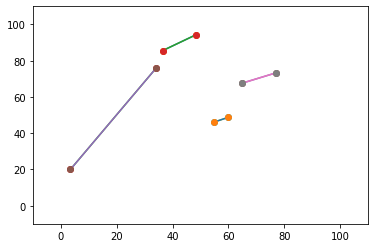

In [29]:
# idx_from = idx_paths.pop()
# idx_from = idx_paths[0]
idx_inic = idx_paths[0]
for i in range(0, len(idx_paths)-1):
    idx_from = idx_paths[i]
    idx_to = idx_paths[i+1]
    
    if idx_from == -1:
        idx_inic = idx_to
        continue

    elif idx_to == -1:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]), 'o')

    else:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]), 'o')


plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.show()

In [30]:
def get_col_name(idx_from, idx_to, sep = "."):
    return chr(ord('a')+idx_from) + sep + chr(ord('a')+idx_to)

In [31]:
def get_col_idx(name, col_names):
    idx_col = np.argwhere(name == col_names)[0][0]
    return idx_col

In [32]:
all_subtours
qty_restr = len(all_subtours)
A = np.zeros((qty_restr * 2, nan_names.shape[0]))
NN_max = np.zeros((node_names.shape[0], node_names.shape[0]))
b = np.zeros(qty_restr * 2)
idx = 0
for subtour in all_subtours:
    qty_max = len(subtour)-1
    for idx_subtour in range(len(subtour)-1):

        idx_from = subtour[idx_subtour]
        idx_to = subtour[idx_subtour+1]
        
        col_name = get_col_name(idx_from, idx_to)
        idx_col = get_col_idx(col_name, nan_names)
        A[idx, idx_col] = 1

#         idx_from = subtour[idx_subtour]
#         idx_to = subtour[idx_subtour+1]
        
        col_name = get_col_name(idx_to, idx_from)
        idx_col = get_col_idx(col_name, nan_names)
        A[idx + qty_restr, idx_col] = 1
        pass
    
    idx_from = subtour[-1]
    idx_to = subtour[0]
    
    col_name = get_col_name(idx_from, idx_to)
    idx_col = get_col_idx(col_name, nan_names)
    A[idx, idx_col] = 1
    
#     idx_from = subtour[-1]
#     idx_to = subtour[0]
    
    col_name = get_col_name(idx_to, idx_from)
    idx_col = get_col_idx(col_name, nan_names)
    A[idx + qty_restr, idx_col] = 1

    b[idx] = qty_max
    b[idx + qty_restr] = qty_max
    
    idx = idx + 1


In [33]:
pd.DataFrame(A,  columns=nan_names)

,a.b,a.c,a.d,a.e,a.f,a.g,a.h,b.a,b.c,b.d,b.e,b.f,b.g,b.h,c.a,c.b,c.d,c.e,c.f,c.g,c.h,d.a,d.b,d.c,d.e,d.f,d.g,d.h,e.a,e.b,e.c,e.d,e.f,e.g,e.h,f.a,f.b,f.c,f.d,f.e,f.g,f.h,g.a,g.b,g.c,g.d,g.e,g.f,g.h,h.a,h.b,h.c,h.d,h.e,h.f,h.g
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
b

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [35]:
bounds = tuple([(0, 1) for arcs in range(0, nan_names.shape[0])])

In [36]:
res_simplex = linprog(costs, A_eq=Aeq_final, b_eq=beq, A_ub=A, b_ub=b, bounds=bounds, method='revised simplex')

/home/diego/.virtualenvs/OS11/lib/python3.6/site-packages/ipykernel_launcher.py:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  """Entry point for launching an IPython kernel.


In [37]:
if (np.sum(np.abs(res_simplex.x - np.round(res_simplex.x))) != 0.0):
    print("Warning! Solution is not integer")

In [38]:
resume_df['Solution1'] = np.round(res_simplex.x)
resume_df['Solution1float'] = res_simplex.x
paths = resume_df.Solution1.index[resume_df.Solution1==1]

In [39]:
res_simplex.x

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0.])

In [40]:
resume_df

,Min bound,Max bound,Costs,Solution,Solution1,Solution1float
a.b,0,1.1,42.380821,0.0,0.0,0.0
a.c,0,1.1,43.553395,0.0,0.0,0.0
a.d,0,1.1,73.384899,0.0,0.0,0.0
a.e,0,1.1,14.855338,1.0,0.0,0.0
a.f,0,1.1,33.731222,0.0,0.0,0.0
a.g,0,1.1,43.668069,0.0,0.0,0.0
a.h,0,1.1,9.655511,0.0,1.0,1.0
b.a,0,1.1,42.380821,0.0,0.0,0.0
b.c,0,1.1,35.135159,0.0,0.0,0.0
b.d,0,1.1,90.825117,0.0,0.0,0.0


In [41]:
named_paths = []
idx_paths = []
not_visited = np.ones(len(paths), dtype = bool)

idx_from = ord(paths[0][0]) - ord('a')

actual_subtour = []

all_subtours = []

while np.sum(not_visited) > 0:

    if not_visited[idx_from]==False:
        idx_from = np.argwhere(not_visited)[0][0]
        idx_paths.append(-1) 
        print("Visitado =>\nFrom:", idx_from)
        
        all_subtours.append(actual_subtour.copy())
        
        actual_subtour = []
    else:
        print("From:", idx_from)

    not_visited[idx_from] = False
    idx_to = ord(paths[idx_from][2]) - ord('a')
    named_paths.append([[chr(ord('a') + idx_from), chr(ord('a') + idx_to)]])
    idx_paths.append(idx_from)
    
    actual_subtour.append(idx_from)
    
    idx_from = idx_to
    
    print("To:", idx_from)
idx_paths.append(-1)
all_subtours.append(actual_subtour.copy())


From: 0
To: 7
From: 7
To: 3
From: 3
To: 2
From: 2
To: 6
From: 6
To: 5
From: 5
To: 1
From: 1
To: 4
From: 4
To: 0


In [42]:
idx_paths

[0, 7, 3, 2, 6, 5, 1, 4, -1]

In [43]:
# if idx_paths.index(-1) != 
# hh

In [44]:
print("This solution has {} subtours".format(idx_paths.count(-1)))

This solution has 1 subtours


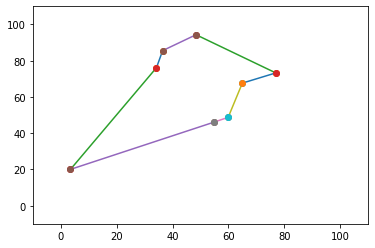

In [45]:
# idx_from = idx_paths.pop()
# idx_from = idx_paths[0]
idx_inic = idx_paths[0]
for i in range(0, len(idx_paths)-1):
    idx_from = idx_paths[i]
    idx_to = idx_paths[i+1]
    
    if idx_from == -1:
        idx_inic = idx_to
        continue

    elif idx_to == -1:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_inic, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_inic, 1]]), 'o')

    else:
        # Dibujar desde from hasta to
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]))
        plt.plot(np.array([cities_location[idx_from, 0], cities_location[idx_to, 0]]), np.array([cities_location[idx_from, 1], cities_location[idx_to, 1]]), 'o')


plt.xlim(-dist_max*0.1, dist_max*1.1)
plt.ylim(-dist_max*0.1, dist_max*1.1)
plt.show()

# Cuidado, le agregué un redondeo al solver y empezó a andar mejor, más allá de que muchas veces no funcione
# Redondeando, me llegó a dar dos veces el mismo resultado, tratando de sacar subtours... (WTF)
# Cambia si le pongo como límite superior 1? NO